In [2]:
# P4-1
import numpy as np

v = np.array([1.0, -2.0, 4.0])
unit_v = v / np.linalg.norm(v)

print(unit_v)


[ 0.21821789 -0.43643578  0.87287156]


In [3]:
# P4-2
import numpy as np

a = np.array([1.0, -2.0, 3.0])
b = np.array([3.0,  1.0, 4.0])

dot_ab = np.dot(a, b)
angle = np.arccos(dot_ab / (np.linalg.norm(a) * np.linalg.norm(b)))

print(angle)


0.8211428883402087


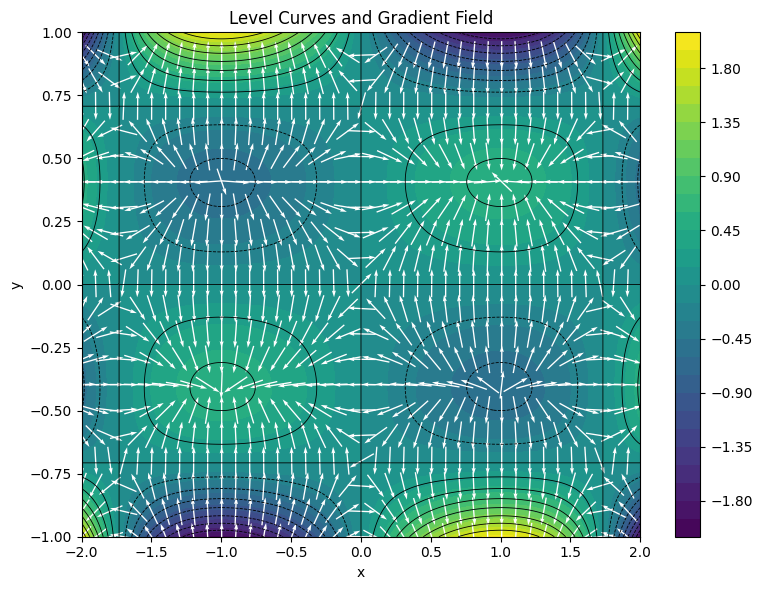

In [ ]:
# P4-3
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x**3 - 3*x) * (2*y**3 - y)

def fx(x, y):
    return (3*x**2 - 3) * (2*y**3 - y)

def fy(x, y):
    return (x**3 - 3*x) * (6*y**2 - 1)

nx, ny = 400, 200
x = np.linspace(-2, 2, nx)
y = np.linspace(-1, 1, ny)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

step = 10
Xs, Ys = X[::step, ::step], Y[::step, ::step]
Ux, Uy = fx(Xs, Ys), fy(Xs, Ys)

mag = np.hypot(Ux, Uy)
mag[mag == 0] = 1.0
Ux, Uy = Ux / mag, Uy / mag

plt.figure(figsize=(8, 6))

contour_filled = plt.contourf(X, Y, Z, levels=30, cmap='viridis')
contour_lines = plt.contour(X, Y, Z, levels=15, colors='black', linewidths=0.6)
cbar = plt.colorbar(contour_filled)

plt.quiver(Xs, Ys, Ux, Uy, pivot='middle', scale=20, color='white', linewidth=0.8)

plt.title(r"Level Curves and Gradient Field")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()

plt.savefig("plot.png", dpi=300)
plt.show()



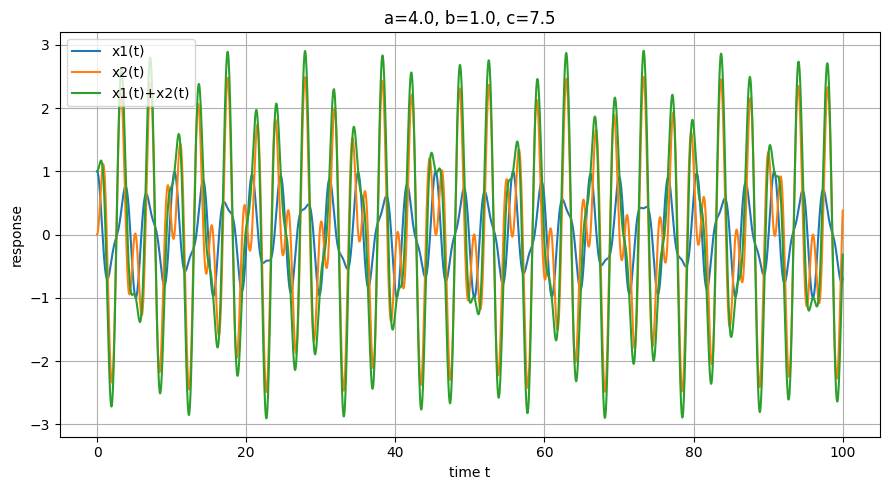

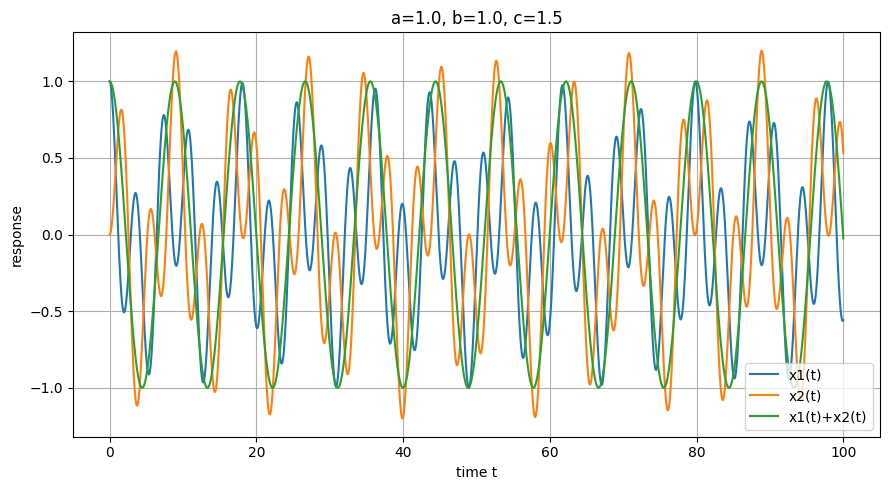

In [4]:
# P5
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def rhs(t, y, a, b, c):
    """Right-hand side for y = [x1, u, x2, v]."""
    x1, u, x2, v = y
    dx1 = u
    du  = -a * x1 + b * (x2 - x1)
    dx2 = v
    dv  = -c * (x2 - x1)
    return [dx1, du, dx2, dv]


def solve_and_plot(params, t_span=(0.0, 100.0), n_eval=4001, title_suffix=""):
    a, b, c = params
    # y0 = [1.0, 0.0, 1.0, 0.0] 
    y0 = [1.0, 0.0, 0.0, 0.0] 
    t_eval = np.linspace(t_span[0], t_span[1], n_eval)

    sol = solve_ivp(
        rhs,
        t_span,
        y0,
        args=(a, b, c),
        method="RK45",           # MATLAB's ode45 equivalent
        t_eval=t_eval,
        rtol=1e-8,
        atol=1e-10,
        dense_output=False,
    )

    t = sol.t
    x1 = sol.y[0]
    x2 = sol.y[2]
    xsum = x1 + x2

    # Plot 
    plt.figure(figsize=(9, 5))
    plt.plot(t, x1, label="x1(t)")
    plt.plot(t, x2, label="x2(t)")
    plt.plot(t, xsum, label="x1(t)+x2(t)")
    plt.title(f"a={a}, b={b}, c={c}")
    plt.xlabel("time t")
    plt.ylabel("response")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(f"coupled_a{a}_b{b}_c{c}.png", dpi=200)
    plt.show()


if __name__ == "__main__":
    # Case (a)
    solve_and_plot(params=(4.0, 1.0, 7.5))

    # Case (b)
    solve_and_plot(params=(1.0, 1.0, 1.5))
